<a href="https://colab.research.google.com/github/PyChef1/METODOS-NUMERICOS/blob/main/ReglaCompuestaSimpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regla de Simpson Compuesta

La **Regla Compuesta de Simpson** es un método numérico para aproximar integrales definidas, especialmente útil cuando la función a integrar es suave. Este método divide el intervalo de integración en subintervalos pares y aplica la regla de Simpson en cada par consecutivo.

## Fórmula

Sea $ f \in C^4[a, b] $, y sea $ n $ un entero par. Dividimos el intervalo $[a, b]$ en $ n $ subintervalos de igual longitud $ h = \frac{b - a}{n} $, con puntos de división $ x_i = a + ih $ para $ i = 0, 1, \dots, n $. La aproximación de la integral $ \int_a^b f(x) \, dx $ está dada por:

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4 \sum_{\substack{i=1 \\ i \text{ impar}}}^{n-1} f(x_i) + 2 \sum_{\substack{i=2 \\ i \text{ par}}}^{n-2} f(x_i) + f(x_n) \right].
$$

## Error de Truncamiento

El error asociado a la Regla Compuesta de Simpson es:

$$
E(f) = -\frac{(b - a) h^4}{180} f^{(4)}(\xi),
$$

para algún $ \xi \in [a, b] $, donde $ f^{(4)} $ denota la cuarta derivada de $ f $.


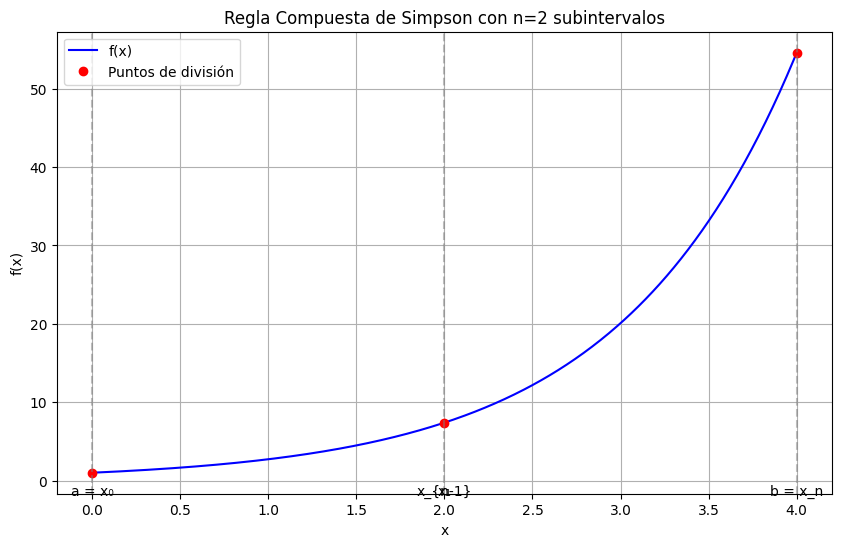

Aproximación de la integral usando la regla de Simpson con n=2: 56.7695829525779
Error: 3.171432919433663


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def regla_compuesta_simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("El número de subintervalos n debe ser par.")

    h = (b - a) / n
    x_points = np.linspace(a, b, n+1)  # Puntos de división
    y_points = f(x_points)

    XI0 = f(a) + f(b)  # Suma de los extremos
    XI1 = 0.0  # Suma de los términos impares (f(x_{2i-1}))
    XI2 = 0.0  # Suma de los términos pares (f(x_{2i}))

    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            XI2 += f(x)  # Términos pares
        else:
            XI1 += f(x)  # Términos impares

    XI = h * (XI0 + 2 * XI2 + 4 * XI1) / 3
    return XI, x_points, y_points

def plot_simpson_partition(f, a, b, n):
    # Calcular la aproximación y obtener los puntos
    aproximacion, x_points, y_points = regla_compuesta_simpson(f, a, b, n)

    # Crear la figura
    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar la función real
    x_fine = np.linspace(a, b, 500)
    ax.plot(x_fine, f(x_fine), 'b-', label='f(x)')

    # Graficar los puntos de división
    ax.plot(x_points, y_points, 'ro', label='Puntos de división')

    # Dibujar líneas verticales en los puntos de división
    for x in x_points:
        ax.axvline(x=x, color='gray', linestyle='--', alpha=0.5)

    # Etiquetar algunos puntos como en la imagen
    ax.text(x_points[0], -0.5, 'a = x₀', ha='center', va='top')
    ax.text(x_points[1], -0.5, 'x₁', ha='center', va='top')
    ax.text(x_points[-2], -0.5, 'x_{n-1}', ha='center', va='top')
    ax.text(x_points[-1], -0.5, 'b = x_n', ha='center', va='top')

    if n >= 4:
        ax.text(x_points[2], -0.5, 'x₂', ha='center', va='top')
        ax.text(x_points[-3], -0.5, 'x_{n-2}', ha='center', va='top')

    # Configuración del gráfico
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Regla Compuesta de Simpson con n={n} subintervalos')
    ax.legend()
    ax.grid(True)

    plt.show()

    return aproximacion

if __name__ == "__main__":
    f = lambda x: np.exp(x)

    # Límites de integración y número de subintervalos
    a = 0
    b = 4
    n = 2  # Debe ser par

    # Calcular y mostrar la gráfica
    aproximacion = plot_simpson_partition(f, a, b, n)
    print(f"Aproximación de la integral usando la regla de Simpson con n={n}: {aproximacion}")

    valor_exacto = np.exp(b)-np.exp(a)
    error = abs(aproximacion - valor_exacto)
    print(f"Error: {error}")